In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv("2025-11-29_16-36-14-520.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
df.head()

,CH1,CH2,time,Ts
0,-0.200000,-0.199219,0.000000e+00,4.000000e-09
1,-0.200000,-0.502344,4.000000e-09,NaN
2,-0.220000,-0.401562,8.000000e-09,NaN
3,-0.140156,-0.500781,1.200000e-08,NaN
4,-0.200937,-0.398438,1.600000e-08,NaN


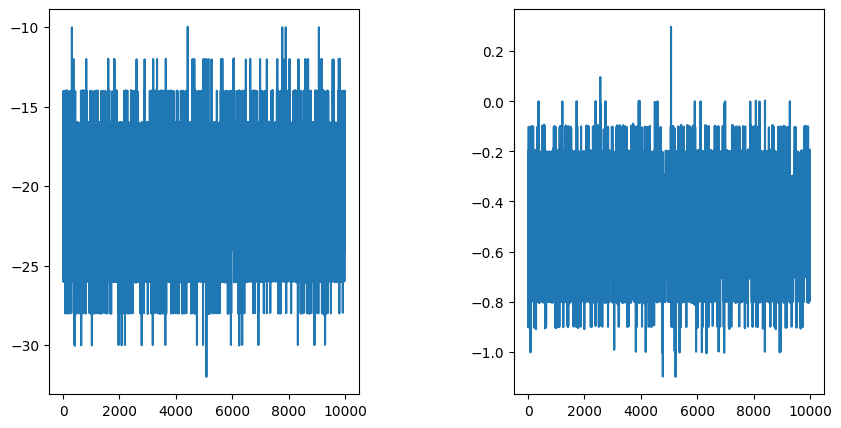

In [5]:

fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
axs[0].plot(vds)
axs[1].plot(iD)


In [6]:
vds_thre= vds.mean()
iD_thre= iD.mean()
vds_thre, iD_thre

(np.float64(-20.777971875), np.float64(-0.48832390625))

In [7]:
df = pd.read_csv("2025-11-29_16-38-27-302.csv")
df.head()

,CH1,CH2,time,Ts
0,3.96,-0.399219,0.000000e+00,4.000000e-09
1,3.98,-0.599219,4.000000e-09,NaN
2,3.98,-0.400000,8.000000e-09,NaN
3,3.96,-0.598438,1.200000e-08,NaN
4,3.96,-0.798438,1.600000e-08,NaN


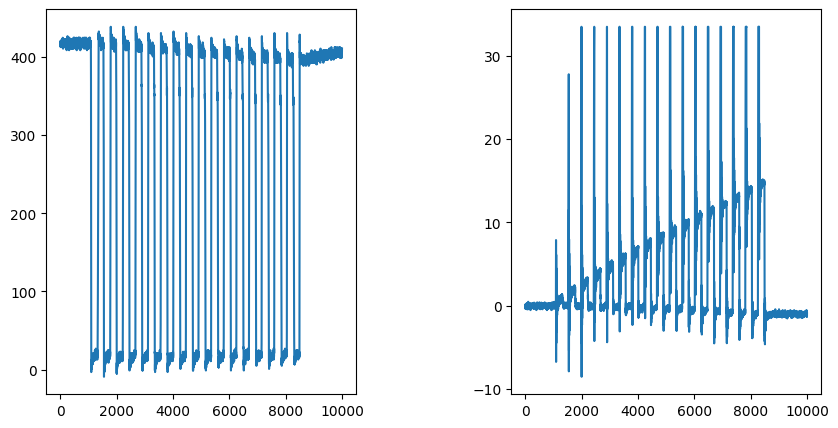

In [8]:
Ts = df.Ts.values[0]
vds = df.CH1.values*100 -vds_thre # x100 probe
iD =  df.CH2.values-iD_thre # x100 probe
iD = iD -iD[:500].mean()
#diD =  df.CH2.values # x100 probe
#diD = diD -diD[:500].mean()

#vgs = df.CH4.values
#vgs = vgs-vgs[:500].mean()


fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
axs[0].plot(vds)
axs[1].plot(iD)

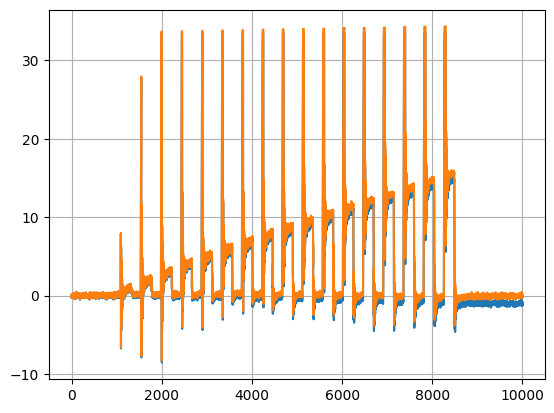

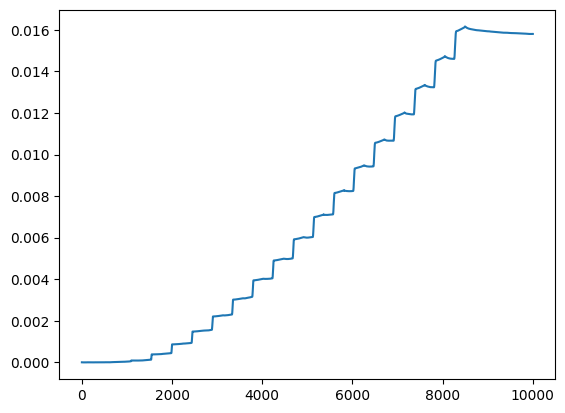

In [9]:
plt.plot(iD)
#k= 7e-5
#iD2= iD + np.arange(0,len(iD))*k
#iD2[:100].mean(), iD2[-100:].mean()
def ID2_find(iD): 
    a = np.arange(len(iD))
    k = (iD[-100:].mean() - iD[:100].mean()) / (a[:100].mean() - a[-100:].mean())
    iD2 = iD + a * k
    return k, iD2 
k, iD2 = ID2_find(iD)

plt.plot(iD2)
plt.grid()
plt.show()
# Primary y-axis
p = vds*iD2
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
#plt.plot(t, p, color='C2')
#plt.show()
plt.plot( E)


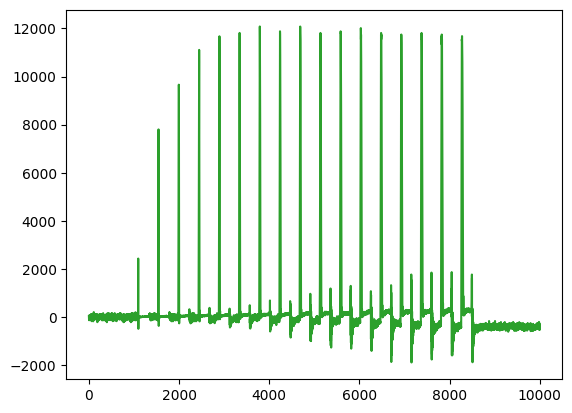

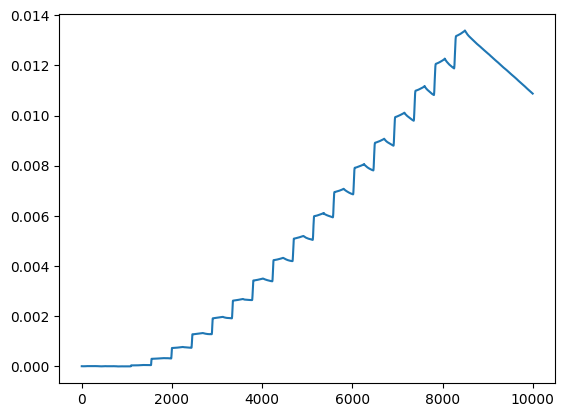

In [10]:
#### Primary y-axis
p = vds*iD
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
plt.plot( p, color='C2')
plt.show()
plt.plot( E)




35


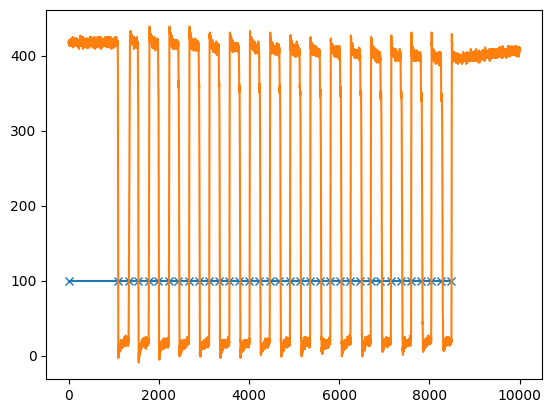

In [11]:
from math import *
arg=[0]
for i in range(10, len(vds)-10):
    if abs(vds[i+3]-vds[i-3])>20:
        if i-arg[-1]>100:
            arg.append(i) 
print(len(arg))
plt.plot(arg, len(arg)*[100], marker="x")
plt.plot(vds)

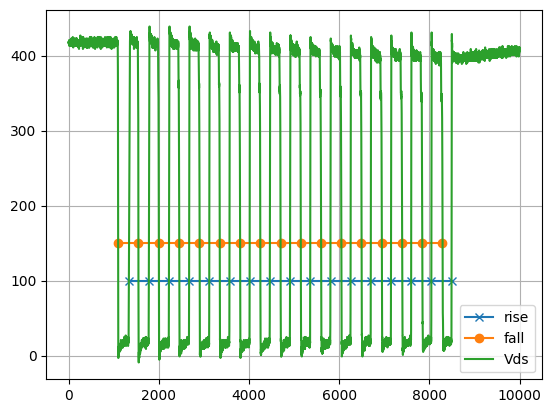

In [12]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
plt.plot(idx_rise, len(idx_rise)*[100], marker="x", label = "rise")
plt.plot(idx_fall, len(idx_fall)*[150], marker="o", label = "fall")
plt.plot(vds, label = "Vds")
plt.legend()
plt.grid()

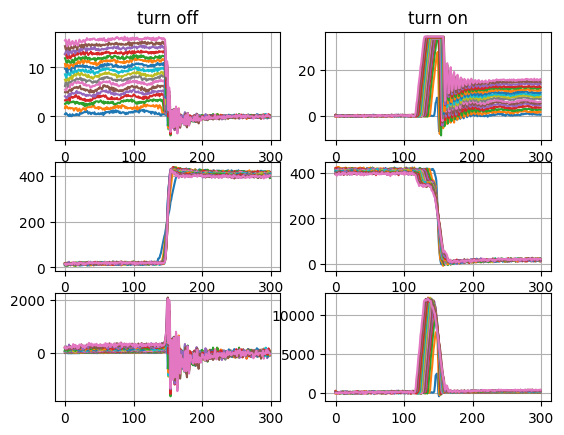

In [13]:
def EONEOFF (plot = True, pltshow = True): 
    idx_rise = trigger (vds, transition= "rise")
    idx_fall= trigger (vds, transition= "fall")
    if plot : 
        fig , axs= plt.subplots(3,2)
    di=150
    Eon={}
    Eoff={}
    deltaV={}
    k, iD2 = ID2_find(iD)
    for i in idx_rise: 
        ### off
        
        
        I1 = iD2[i-di-10:i-di].mean()
        
    
    
        I0 = iD2[i+di-50:i+di].mean()
        V0 = iD2[i-di:i-di+50].mean()
        V0=0
        p=(vds[i-di:i+di]-V0)*(iD2[i-di:i+di]-I0)
        #print(i, di, i-di,i+di)
  
        indx = np.where(p>p.max()/2)[0]
        p2= p[indx[0]-20:indx[-1]+20]
        p2= p
        E= np.sum(p2)*Ts*1e6
    
        Eoff[I1]=E

        if plot :
            axs[2][0].plot(p)
            axs[1][0].plot(vds[i-di:i+di])
            axs[0][0].set_title("turn off")
            axs[0][0].plot(iD2[i-di:i+di]-I0)
        deltaV[I1]= vds[i-di:i+di].max()-vds[i-di:i+di][-20:].mean()
    for i in idx_fall: 
        I1 = iD2[i+10:i+di*2+10].mean()
        I0 = iD2[i-di:i-di+50].mean()
    
        V0 = iD2[i+di-50:i+di].mean()
        V0=0
    
        p=(vds[i-di:i+di]-V0)*(iD2[i-di:i+di]-I0)
        indx = np.where(p>p.max()/2)[0]
        p2= p[indx[0]-20:indx[-1]+20]
        p2 =p
        E= np.sum(p2)*Ts*1e6
        
        if plot :
            axs[2][1].plot(p)
            axs[1][1].plot(vds[i-di:i+di])
            axs[0][1].set_title("turn on")
            axs[0][1].plot(iD2[i-di:i+di]-I0)
        Eon[I1]=E
    if plot : 
        for ax in axs .flatten(): 
            ax.grid()
    if pltshow:
        plt.show()
    else:
        plt.close(fig)   # <-- prevents showing but keeps fig so user can save it
    return Eon , Eoff, deltaV, fig
Eon , Eoff, deltaV , fig= EONEOFF (plot = True, pltshow = True)


In [15]:
Eon , Eoff, deltaV , fig= EONEOFF (plot = True, pltshow = False)
fig.savefig("figs/test.png")

<Axes: >

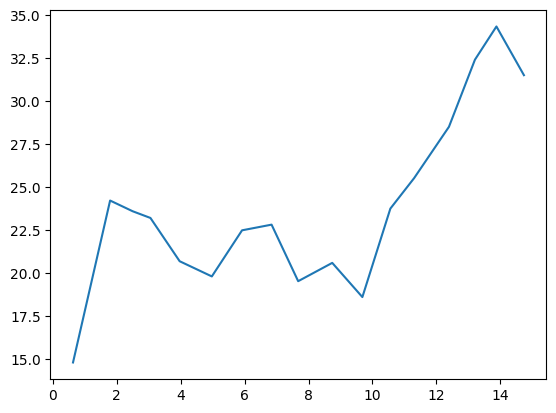

In [16]:
pd.Series(deltaV).plot()

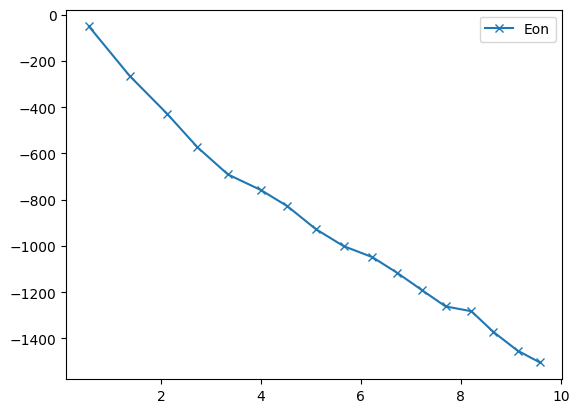

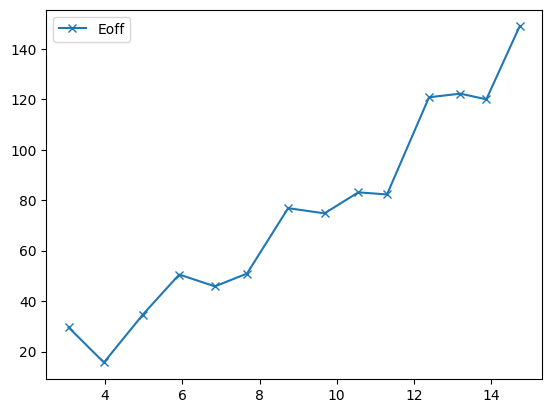

In [17]:
(-pd.Series(Eon)).plot(label = "Eon",marker="x")
plt.legend()
plt.show()
s=pd.Series(Eoff)
s=s[s.index>3]
s.plot(label = "Eoff",marker="x")
plt.legend()

# End

In [49]:
l = """3 ohm
2025-11-29_16-38-27-302
5 ohm
2025-11-29_16-38-59-363""".replace(" ", "").split("\n")
names = l[1::2]
labels=l[0::2]
print(names), print(labels)

['2025-11-29_16-38-27-302', '2025-11-29_16-38-59-363']
['3ohm', '5ohm']


(None, None)

In [50]:
#list={}
dic  = {}
for i in range(len(names)):
    data ={}
    path  = names[i]+".csv"
    label = labels[i]
    print(path, label)
    df = pd.read_csv(path)
    Ts = df.Ts.values[0]
    vds = df.CH1.values*100 -vds_thre # x100 probe
    iD =  df.CH2.values-iD_thre # x100 probe
    iD = iD -iD[:500].mean()
    
    

    Eon , Eoff, deltaV , fig= EONEOFF (plot = True, pltshow = False)
    fig.savefig(f"figs/{label.replace("/", "_")}.png")
      
        
    #plt.show()  
    data["Eon"]=Eon
    #(-pd.Series(Eon)).plot(label = "Eon",marker="x")
    #s.plot(label = "Eoff",marker="x")
    data["Eoff"]= Eoff
    data["deltaV"]= deltaV
    #plt.legend()
    #plt.show()
    dic[label]= data

2025-11-29_16-38-27-302.csv 3ohm
2025-11-29_16-38-59-363.csv 5ohm


In [51]:
#dic

In [52]:
dic.keys()

dict_keys(['3ohm', '5ohm'])

In [53]:
dic["5ohm"]["Eon"]

{np.float64(0.5601455693655303): np.float64(51.61770635416288),
 np.float64(1.3729263072127527): np.float64(265.22190914346567),
 np.float64(2.1182955867266413): np.float64(427.8974340043893),
 np.float64(2.730608127761995): np.float64(573.9478649661602),
 np.float64(3.3384591781092174): np.float64(691.133414110052),
 np.float64(4.002305964725379): np.float64(759.1154349010776),
 np.float64(4.5292455567392675): np.float64(828.554746964086),
 np.float64(5.092691854876894): np.float64(926.8368731386771),
 np.float64(5.653148569681187): np.float64(1001.0687809315117),
 np.float64(6.227993305318814): np.float64(1048.6214832244536),
 np.float64(6.729770332623107): np.float64(1117.1841540984349),
 np.float64(7.225219234927399): np.float64(1191.9499577500685),
 np.float64(7.694201991398359): np.float64(1261.8146013093522),
 np.float64(8.21137690301452): np.float64(1282.7059848546241),
 np.float64(8.647308129340278): np.float64(1371.443726452964),
 np.float64(9.134019499289774): np.float64(145

In [54]:
dic["3ohm"]["Eon"]

{np.float64(0.5601455693655303): np.float64(51.61770635416288),
 np.float64(1.3729263072127527): np.float64(265.22190914346567),
 np.float64(2.1182955867266413): np.float64(427.8974340043893),
 np.float64(2.730608127761995): np.float64(573.9478649661602),
 np.float64(3.3384591781092174): np.float64(691.133414110052),
 np.float64(4.002305964725379): np.float64(759.1154349010776),
 np.float64(4.5292455567392675): np.float64(828.554746964086),
 np.float64(5.092691854876894): np.float64(926.8368731386771),
 np.float64(5.653148569681187): np.float64(1001.0687809315117),
 np.float64(6.227993305318814): np.float64(1048.6214832244536),
 np.float64(6.729770332623107): np.float64(1117.1841540984349),
 np.float64(7.225219234927399): np.float64(1191.9499577500685),
 np.float64(7.694201991398359): np.float64(1261.8146013093522),
 np.float64(8.21137690301452): np.float64(1282.7059848546241),
 np.float64(8.647308129340278): np.float64(1371.443726452964),
 np.float64(9.134019499289774): np.float64(145

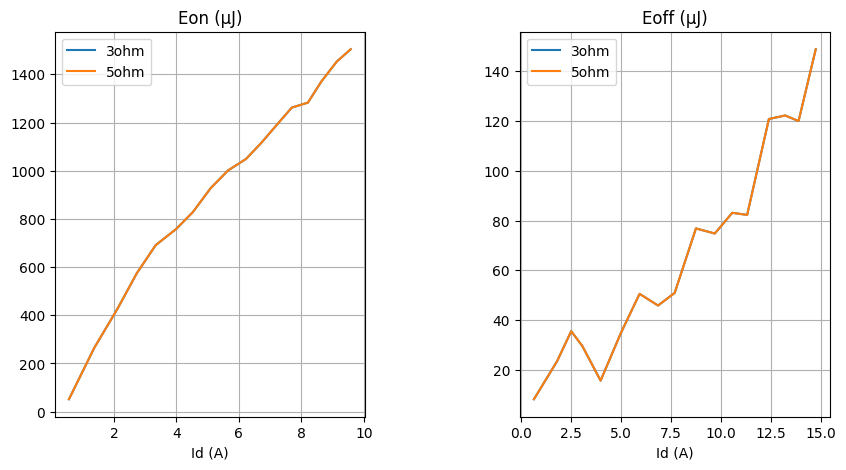

In [55]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():
    Eon = v["Eon"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eon)

    Splot.plot(ax = axs[0], label = kk)
    Eoff = v["Eoff"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[1], label = kk)
axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [56]:
P = 100e-6*100e3
print("Power off by mos W @ 11A", P)

Power off by mos W @ 11A 10.0


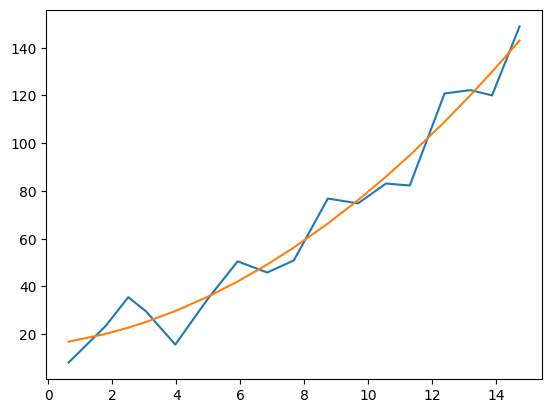

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array(Splot .index).reshape(-1,1)
y = Splot .values
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X.reshape(-1,1))

model = LinearRegression().fit(X2, y)
yh = model.predict(X2)
plt.plot(X, y)
plt.plot(X, yh)

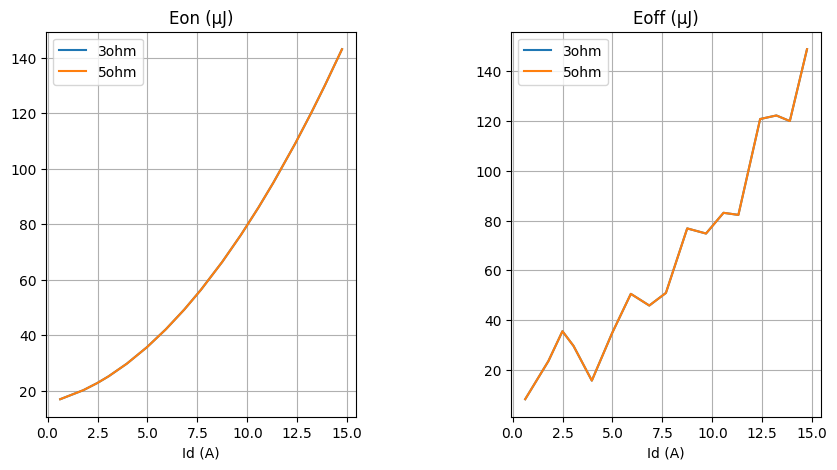

In [27]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():

    Eoff = v["Eoff"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[1], label = kk)


    X = np.array(Splot .index).reshape(-1,1)
    y = Splot .values
    poly = PolynomialFeatures(2)
    X2 = poly.fit_transform(X.reshape(-1,1))
    
    model = LinearRegression().fit(X2, y)
    yh = model.predict(X2)
    axs[0].plot(X, yh, label = kk)


axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [171]:
v.keys()

dict_keys(['Eon', 'Eoff', 'deltaV'])

C:\Users\a037702\AppData\Local\Temp\ipykernel_16880\4199451711.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


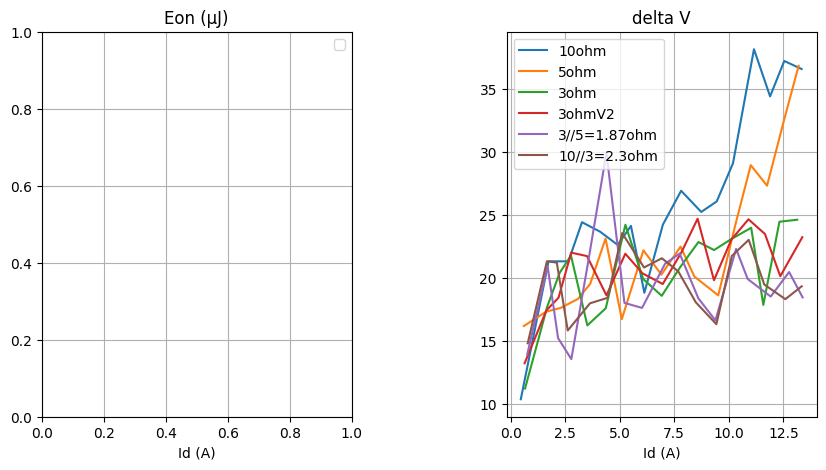

In [172]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
for kk, v in dic.items():

    Eoff = v['deltaV']
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    
    Splot.plot(ax = axs[1], label = kk)




axs[0].set_title("Eon (µJ)")
axs[1].set_title("delta V")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [58]:
import json

with open("res.json", "w") as f:
    json.dump(dic, f)

### ringing Mosfet

In [173]:
# IPW60R037P7
# https://www.infineon.com/assets/row/public/documents/24/49/infineon-ipw60r037p7-ds-en.pdf?fileId=5546d46259d9a4bf015a5bb7bab83ca7


In [78]:
Fr1 = 4.88*10
Fr2 = 4.86*10
Fr = 1e6*(Fr1+Fr2)/2
Fr/1e6

48.7

In [79]:
from math import *
#Coss= 85e-12
Coer=156e-12

#C= Coss
C= Coer
w = Fr*(2*pi) # 1/sqrt(LC)
L= 1/(C*w**2)
print(L*1e9, "nF")

68.46328640527037 nF


In [80]:
# Verification 
1e-6/(2*pi*sqrt(L*C))

48.7

# Calibration 

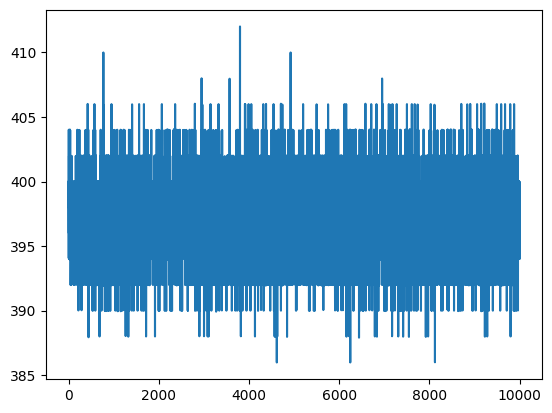

In [42]:
df = pd.read_csv("2025-11-29_16-36-14-520.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
vds0= vds.mean()
id0= iD.mean()

df = pd.read_csv("2025-11-29_16-37-01-715.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
vds1= vds.mean()
id1= iD.mean()
# calb 414.4v

plt.plot(vds)

In [48]:
print(id0, id1, vds0, vds1, vds1-vds0, 414.4,(vds1-vds0)/414.4)

-0.48832390625 -0.473954296875 -20.777971875 397.1613328125 417.9393046875 414.4 1.0085407931648167


In [67]:
import json

with open("res.json", "r") as f:
    dic4 = json.load(f)
with open("../366.5V_V3/res.json", "r") as f:
    dic3= json.load(f)

In [68]:
dic3.keys()

dict_keys(['10ohm', '5ohm', '3ohm', '3ohmV2', '3//5=1.87ohm', '10//3=2.3ohm'])

In [69]:
dic4.keys()

dict_keys(['3ohm', '5ohm'])

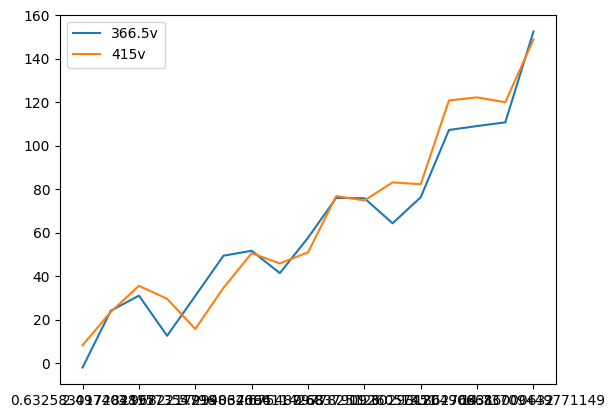

In [92]:
import pandas as pd
pd.Series(dic3['3ohm']["Eoff"]).plot(label ="366.5v" )
pd.Series(dic4['3ohm']["Eoff"]).plot(label ="415v" )
plt.legend()

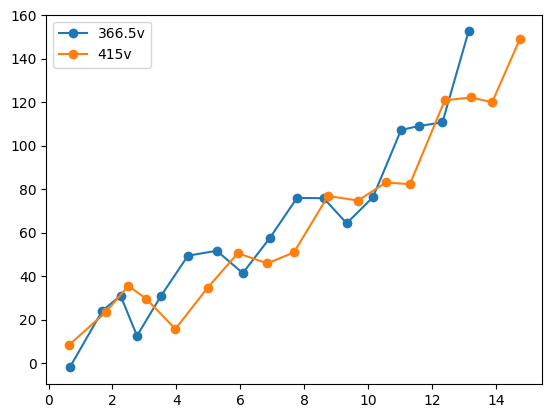

In [110]:
s= dic3['3ohm']["Eoff"]
x = np.array(list(s.keys())).astype(float)
y = np.array(list(s.values()))
plt.plot(x, y , label ="366.5v" , marker = "o")

s= dic4['3ohm']["Eoff"]
x = np.array(list(s.keys())).astype(float)
y = np.array(list(s.values()))
plt.plot(x, y , label ="415v"  , marker = "o")
plt.legend()

In [ ]:
s= dic3['3ohm']["Eoff"]
x = np.array(list(s.keys())).astype(float)
y = np.array(list(s.values()))
plt.plot(x, y , label ="366.5v" , marker = "o")


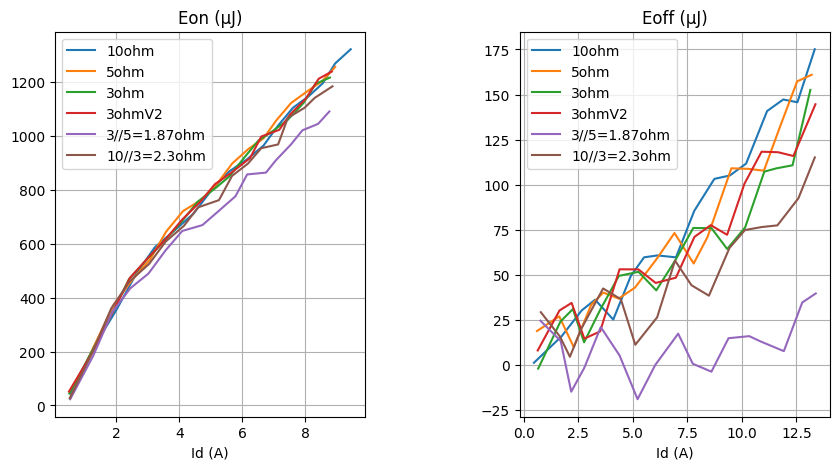

In [117]:
fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })

dic = dic3
for kk, v in dic.items():
    Eon = v["Eon"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eon)
    Splot.index = Splot.index.astype("float")

    Splot.plot(ax = axs[0], label = kk)
    Eoff = v["Eoff"]
    #Eon = Eon[Eon.index>1]
    Splot = pd.Series(Eoff)
    Splot.index = Splot.index.astype("float")
    
    Splot.plot(ax = axs[1], label = kk)
axs[0].set_title("Eon (µJ)")
axs[1].set_title("Eoff (µJ)")
axs[0].set_xlabel("Id (A)")
axs[1].set_xlabel("Id (A)")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()